In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data//train/train.csv')

### 数据预处理

In [3]:
data

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y,Y_1,136.0,150.0,offline,intermediate,9389.0,M,Matriculation,3.0,24.0,5.0,N,1.0,0
1,16523_44,T,T_1,131.0,44.0,offline,easy,16523.0,F,High School Diploma,4.0,26.0,2.0,N,3.0,1
2,13987_178,Z,Z_2,120.0,178.0,online,easy,13987.0,M,Matriculation,1.0,40.0,1.0,N,2.0,1
3,13158_32,T,T_2,117.0,32.0,offline,easy,13158.0,F,Matriculation,3.0,NaN,4.0,N,1.0,1
4,10591_84,V,V_3,131.0,84.0,offline,intermediate,10591.0,F,High School Diploma,1.0,42.0,2.0,N,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,4379_115,Y,Y_4,121.0,115.0,offline,hard,4379.0,F,High School Diploma,2.0,NaN,5.0,N,4.0,1
49994,3809_58,U,U_1,NaN,58.0,offline,intermediate,3809.0,F,High School Diploma,3.0,30.0,2.0,N,3.0,1
49995,18109_42,T,T_2,117.0,42.0,online,easy,18109.0,F,High School Diploma,2.0,41.0,2.0,N,1.0,1
49996,6384_113,Y,Y_4,121.0,113.0,offline,intermediate,6384.0,M,Matriculation,3.0,NaN,2.0,N,5.0,1


In [4]:
import missingno as msno
msno.matix(data.sample(500))#可视化缺失值

AttributeError: module 'missingno' has no attribute 'matix'

age特征缺失严重，需要填充，否则造成大量训练数据浪费

### 这里，我们采用knn临近算法来填充数据

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# y=data['is_pass']
# X=data.loc[:,'program_type':'trainee_engagement_rating']
# x_train=X.loc[X['age'].notnull(),:]
# x_test=X.loc[X['age'].isnull(),:]
# y_train=y[x_train.index]
# y_train=y[x_test.index]
# x_train=x_train['age']
# x_test=x_test['age']

In [5]:
# x_train=x_train.values.reshape(-1,1)
# y_train=y_train.values.reshape(-1,1)

In [6]:
# RF = RandomForestRegressor().fit(x_train,y_train)

In [7]:
from sklearn.impute import KNNImputer

In [8]:
data_copy = data.copy(deep=True)
print(data_copy.isnull().sum())

id_num                           0
program_type                   731
program_id                     699
program_duration               675
test_id                        725
test_type                      702
difficulty_level               703
trainee_id                     739
gender                         707
education                      702
city_tier                      700
age                          19379
total_programs_enrolled        692
is_handicapped                 718
trainee_engagement_rating      772
is_pass                          0
dtype: int64


In [9]:
null_index = data_copy.loc[data_copy['age'].isnull(), :].index
null_index

Int64Index([    3,     8,    10,    11,    12,    13,    14,    17,    22,
               23,
            ...
            49964, 49972, 49974, 49975, 49976, 49979, 49981, 49987, 49993,
            49996],
           dtype='int64', length=19379)

In [10]:
imputer = KNNImputer(n_neighbors=10)
data_copy[['age', 'program_duration', 'total_programs_enrolled']] = imputer.fit_transform(data_copy[['age', 'program_duration', 'total_programs_enrolled']])
print(data_copy.isnull().sum())

id_num                         0
program_type                 731
program_id                   699
program_duration               0
test_id                      725
test_type                    702
difficulty_level             703
trainee_id                   739
gender                       707
education                    702
city_tier                    700
age                            0
total_programs_enrolled        0
is_handicapped               718
trainee_engagement_rating    772
is_pass                        0
dtype: int64


In [13]:
data_copy.iloc[null_index]

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
3,13158_32,T,T_2,117.0,32.0,offline,easy,13158.0,F,Matriculation,3.0,37.0,4.0,N,1.0,1
8,5652_57,U,U_1,134.0,57.0,offline,easy,5652.0,M,Matriculation,4.0,34.2,3.0,N,3.0,1
10,9932_80,V,V_3,131.0,80.0,offline,easy,9932.0,F,High School Diploma,3.0,36.0,2.0,N,4.0,1
11,8543_31,T,T_3,134.0,31.0,online,easy,8543.0,F,High School Diploma,4.0,35.0,2.0,N,1.0,1
12,15848_149,Y,Y_1,136.0,149.0,offline,intermediate,15848.0,M,High School Diploma,1.0,37.8,4.0,N,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49979,20030_116,Y,Y_4,121.0,116.0,offline,hard,20030.0,M,Matriculation,4.0,34.7,3.0,N,3.0,1
49981,15274_183,Z,Z_1,136.0,183.0,online,easy,15274.0,F,Matriculation,2.0,31.4,1.0,N,2.0,1
49987,15829_64,U,U_1,134.0,64.0,online,easy,15829.0,M,High School Diploma,2.0,39.4,4.0,Y,4.0,1
49993,4379_115,Y,Y_4,121.0,115.0,offline,hard,4379.0,F,High School Diploma,2.0,38.2,5.0,N,4.0,1


In [14]:
data['age']=data_copy['age']

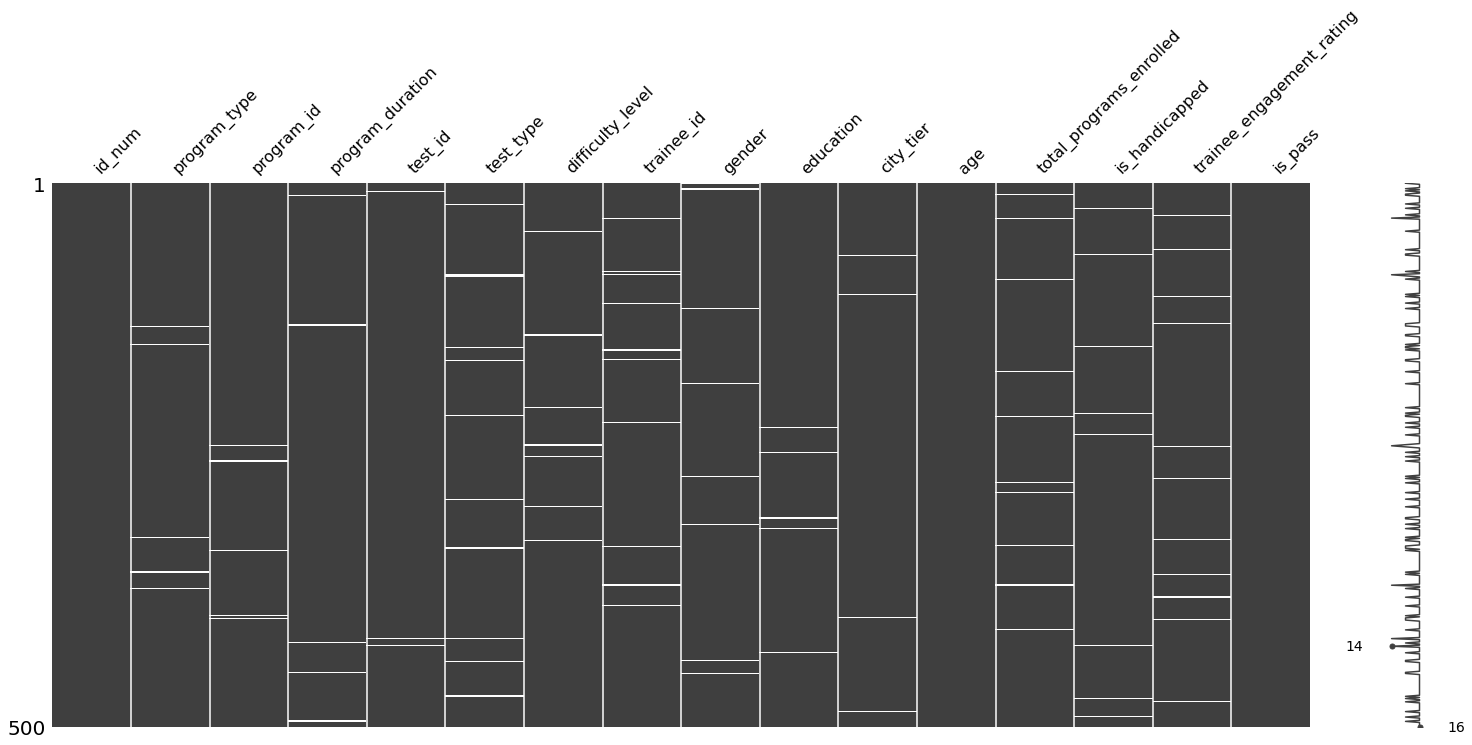

In [15]:
import missingno as msno
msno.matrix(data.sample(500))#可视化缺失值

### 处理完缺失值较多的age后，我们对其余的数据进行删除操作

In [16]:
# 删除带NAN的数据行
data=data.dropna(axis=0,how='any')

### 对数据进行独热编码

In [18]:
data.loc[data['gender'] == 'M', 'gender'] = 0
data.loc[data['gender'] == 'F', 'gender'] = 1

In [19]:
difficulty_level = pd.get_dummies(data[["difficulty_level"]])
program_type = pd.get_dummies(data[["program_type"]])
is_handicapped=pd.get_dummies(data[['is_handicapped']])
education=pd.get_dummies(data[['education']])

In [20]:
data["program_id"] = pd.factorize(data["program_id"])[0].astype(np.uint16)

<ipython-input-20-64dd60c549e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["program_id"] = pd.factorize(data["program_id"])[0].astype(np.uint16)


In [21]:
y=data['is_pass']
data.drop(['is_pass', 'program_type','is_handicapped','education','difficulty_level'], axis=1)

,id_num,program_id,program_duration,test_id,test_type,trainee_id,gender,city_tier,age,total_programs_enrolled,trainee_engagement_rating
0,9389_150,0,136.0,150.0,offline,9389.0,0,3.0,24.0,5.0,1.0
1,16523_44,1,131.0,44.0,offline,16523.0,1,4.0,26.0,2.0,3.0
2,13987_178,2,120.0,178.0,online,13987.0,0,1.0,40.0,1.0,2.0
3,13158_32,3,117.0,32.0,offline,13158.0,1,3.0,37.0,4.0,1.0
4,10591_84,4,131.0,84.0,offline,10591.0,1,1.0,42.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
49991,13936_61,7,134.0,61.0,online,13936.0,0,4.0,26.0,3.0,1.0
49992,12375_173,2,120.0,173.0,online,12375.0,1,4.0,26.0,1.0,1.0
49993,4379_115,10,121.0,115.0,offline,4379.0,1,2.0,38.2,5.0,4.0
49995,18109_42,3,117.0,42.0,online,18109.0,1,2.0,41.0,2.0,1.0


In [22]:
data=data.join([program_type,is_handicapped,education,difficulty_level])

In [23]:
data.loc[data['test_type'] == 'offline', 'test_type'] = 0
data.loc[data['test_type'] == 'online', 'test_type'] = 1

In [25]:
data=data.drop(['is_pass', 'program_type','is_handicapped','education','difficulty_level'], axis=1)

In [28]:
data=data.drop(['id_num'],axis=1)

## 模型预测

In [91]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

alg = LogisticRegression(random_state=1, solver='liblinear') # 初始化逻辑回归类
alg.fit(data,y)

LogisticRegression(random_state=1, solver='liblinear')

In [92]:
test_data=pd.read_csv('./data/test/test1.csv')

In [93]:
from sklearn.impute import KNNImputer
test_data_copy = test_data.copy(deep=True)

null_index = data_copy.loc[data_copy['age'].isnull(), :].index

imputer = KNNImputer(n_neighbors=10)
test_data_copy[['age', 'program_duration', 'total_programs_enrolled']] = imputer.fit_transform(test_data_copy[['age', 'program_duration', 'total_programs_enrolled']])

test_data_copy.iloc[null_index]
test_data['age']=test_data_copy['age']

In [94]:
test_data.loc[test_data['gender'] == 'M', 'gender'] = 0
test_data.loc[test_data['gender'] == 'F', 'gender'] = 1

In [95]:
difficulty_level = pd.get_dummies(test_data[["difficulty_level"]])
program_type = pd.get_dummies(test_data[["program_type"]])
is_handicapped=pd.get_dummies(test_data[['is_handicapped']])
education=pd.get_dummies(test_data[['education']])

In [96]:
test_data=test_data.drop(['is_pass', 'program_type','is_handicapped','education','difficulty_level'], axis=1)

In [97]:
test_data=test_data.drop(['id_num'],axis=1)

In [98]:
test_data["program_id"] = pd.factorize(test_data["program_id"])[0].astype(np.uint16)

In [99]:
test_data=test_data.join([program_type,is_handicapped,education,difficulty_level])

In [100]:
test_data

,program_id,program_duration,test_id,test_type,trainee_id,gender,city_tier,age,total_programs_enrolled,trainee_engagement_rating,...,is_handicapped_Y,education_Bachelors,education_High School Diploma,education_Masters,education_Matriculation,education_No Qualification,difficulty_level_easy,difficulty_level_hard,difficulty_level_intermediate,difficulty_level_vary hard
0,0,121.0,124.0,online,1442.0,0,2.0,41.4,8.0,4.0,...,0,0,0,0,0,0,1,0,0,0
1,1,117.0,38.0,NaN,12373.0,1,4.0,31.0,2.0,3.0,...,0,0,1,0,0,0,1,0,0,0
2,2,134.0,21.0,offline,12035.0,1,4.0,33.0,2.0,1.0,...,0,0,1,0,0,0,1,0,0,0
3,3,131.0,86.0,offline,11148.0,0,1.0,34.5,2.0,1.0,...,0,0,0,0,1,0,0,0,0,1
4,4,135.0,131.0,online,1362.0,0,2.0,45.0,2.0,4.0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11679,10,130.0,161.0,offline,3882.0,1,3.0,41.2,1.0,2.0,...,0,0,1,0,0,0,1,0,0,0
11680,1,117.0,38.0,online,3426.0,1,2.0,45.0,2.0,2.0,...,0,0,1,0,0,0,1,0,0,0
11681,11,120.0,142.0,online,13063.0,0,2.0,34.8,3.0,4.0,...,0,0,0,0,1,0,1,0,0,0
11682,3,131.0,82.0,offline,5667.0,0,3.0,27.0,2.0,2.0,...,0,0,1,0,0,0,0,0,1,0


In [101]:
test_data.loc[test_data['test_type'] == 'offline', 'test_type'] = 0
test_data.loc[test_data['test_type'] == 'online', 'test_type'] = 1

In [102]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11684 entries, 0 to 11683
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   program_id                     11684 non-null  uint16 
 1   program_duration               11523 non-null  float64
 2   test_id                        11543 non-null  float64
 3   test_type                      11549 non-null  object 
 4   trainee_id                     11547 non-null  float64
 5   gender                         11558 non-null  object 
 6   city_tier                      11564 non-null  float64
 7   age                            11684 non-null  float64
 8   total_programs_enrolled        11538 non-null  float64
 9   trainee_engagement_rating      11532 non-null  float64
 10  program_type_S                 11684 non-null  uint8  
 11  program_type_T                 11684 non-null  uint8  
 12  program_type_U                 11684 non-null 

In [103]:
test_data.describe()

,program_id,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,program_type_S,program_type_T,...,is_handicapped_Y,education_Bachelors,education_High School Diploma,education_Masters,education_Matriculation,education_No Qualification,difficulty_level_easy,difficulty_level_hard,difficulty_level_intermediate,difficulty_level_vary hard
count,11684.000000,11523.000000,11543.000000,11547.000000,11564.000000,11684.000000,11538.000000,11532.000000,11684.000000,11684.000000,...,11684.000000,11684.000000,11684.000000,11684.000000,11684.000000,11684.000000,11684.000000,11684.000000,11684.000000,11684.000000
mean,798.985365,128.147184,90.710041,9768.961289,2.250432,36.185841,2.588577,2.394641,0.017117,0.252824,...,0.086871,0.157737,0.465851,0.007788,0.348853,0.006933,0.543735,0.137367,0.276446,0.030383
std,7155.086543,6.890975,51.040430,5693.214293,1.014670,7.342221,1.248870,1.329928,0.129715,0.434650,...,0.281658,0.364510,0.498854,0.087911,0.476628,0.082976,0.498105,0.344249,0.447259,0.171647
min,0.000000,117.000000,0.000000,3.000000,1.000000,17.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,121.000000,45.000000,4964.000000,1.000000,30.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,131.000000,89.000000,9563.000000,2.000000,36.200000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,13.000000,134.000000,135.000000,14411.500000,3.000000,43.000000,3.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,65535.000000,136.000000,187.000000,20098.000000,4.000000,63.000000,12.000000,5.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [105]:
test_data['program_duration'] = test_data['program_duration'].fillna(128)
test_data['test_id'] = test_data['test_id'].fillna(91)
test_data['trainee_id'] = test_data['trainee_id'].fillna(9768)
test_data['gender'] = test_data['gender'].fillna(1)
test_data['test_id'] = test_data['test_id'].fillna(2)

In [108]:
test_data=test_data.fillna(method='bfill')

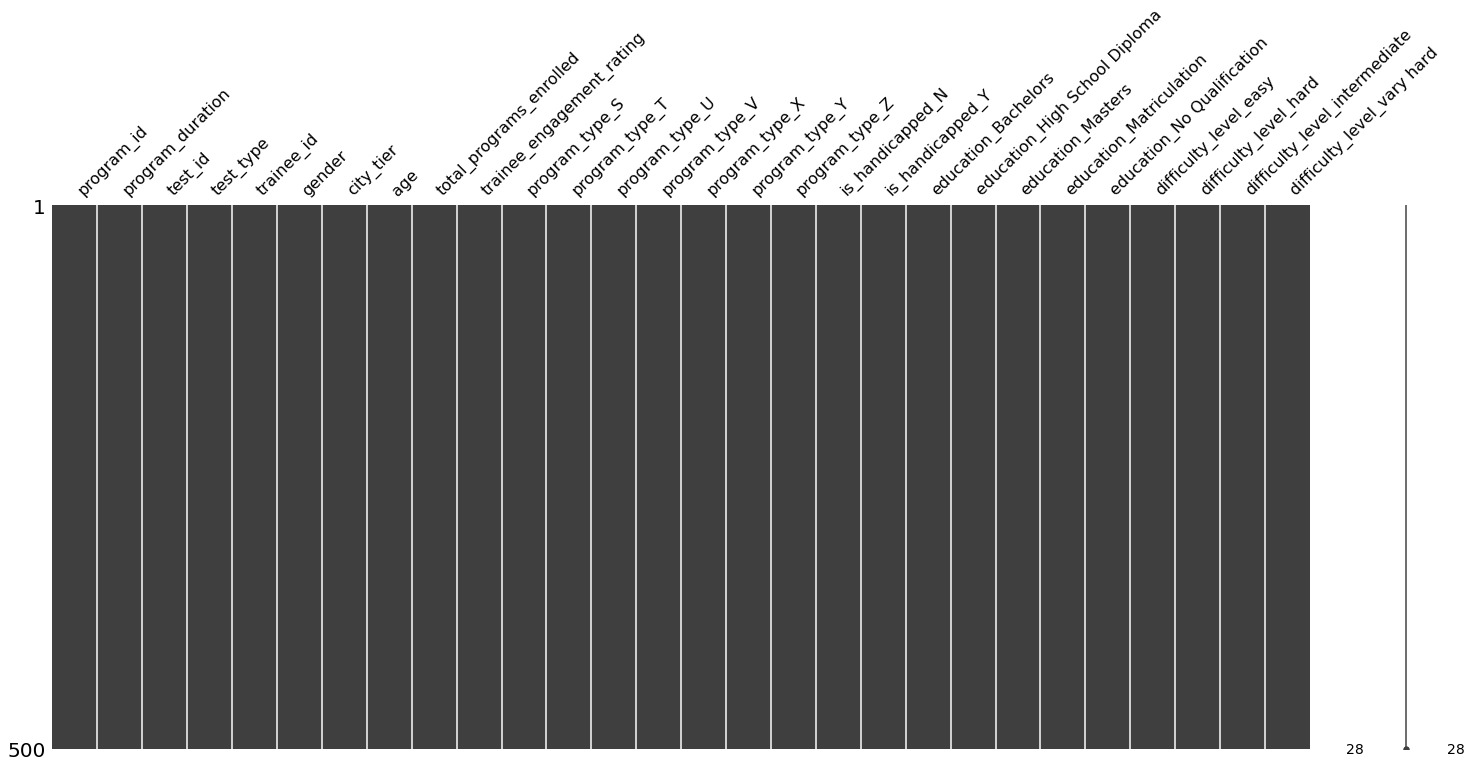

In [109]:
import missingno as msno
msno.matrix(test_data.sample(500))#可视化缺失值

In [110]:
y_predict=alg.predict(test_data)

In [52]:
sub1=pd.read_csv('./data/submission/submission1.csv')

In [111]:
sub1['is_pass']=y_predict

In [112]:
sub1.head()

,id_num,is_pass
0,1442_124,1
1,12373_38,1
2,12035_21,1
3,11148_86,0
4,1362_131,1


In [113]:
sub1.to_csv("version3.csv",index=False,sep=',')

In [ ]:
sub1['is_pass']=y_predict